<a href="https://colab.research.google.com/github/Nuthan03/NN_Classification/blob/main/NN_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something is one thing or another.

For example, you might want to:
* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

A few types of classification problems:

*   Binary classification
*   Multiclass clasification
*   Multilabel classification



## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out the features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


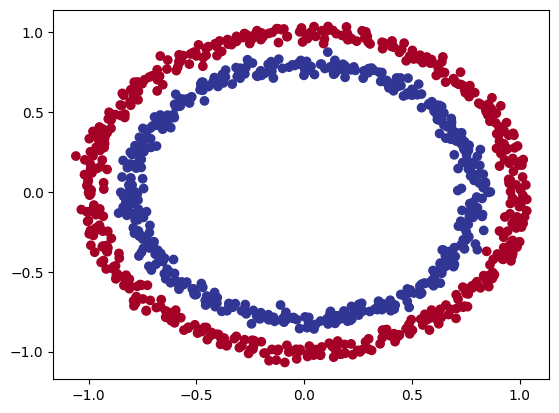

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

In [ ]:
import tensorflow as tf


In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 5.3514 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.6902 - accuracy: 0.4670
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.9799 - accuracy: 0.4780
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 1.4266 - accuracy: 0.4870
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.4950


In [ ]:
model.fit(x, y, epochs=200, verbose=0)
model.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 6.5043 - accuracy: 0.4890


[6.504255771636963, 0.48899999260902405]

## Improving our model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5120


[0.6974451541900635, 0.5120000243186951]

In [ ]:
import numpy as np

In [ ]:

def plot_dicision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stacks 2D arrays together

  # Make prediction using the trained model
  y_preds = model.predict(x_in)

  # Check for multiclass
  if model.output_shape[-1] > 1: # Checks the final dimension of the model's output_shape
    print("doing multi-class classfication")
    # We have to reshape our predictions to get them ready for plotting
    y_preds = np.argmax(y_preds, axis=1).reshape(xx.shape)
  else:
    print("doing binary classfication")
    y_preds = np.round(np.max(y_preds, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_preds, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classfication


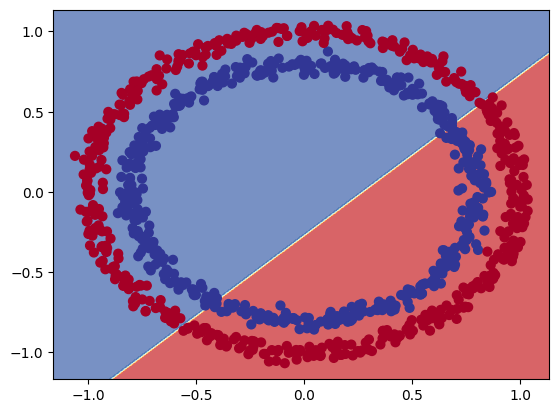

In [ ]:
plot_dicision_boundary(model_3, x, y)

In [ ]:
# Let's see if we can use our model can be used for a regression problem

tf.random.set_seed(42)

x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split the data into train and test split
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit the model
model_3.fit(x_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 345.5741 - mae: 345.5741
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 236.8039 - mae: 236.8039
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 131.3893 - mae: 131.3893
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 48.1738 - mae: 48.1738
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 76.8649 - mae: 76.8649
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 74.7323 - mae: 74.7323
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 47.4993 - mae: 47.4993
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 51.0506 - mae: 51.0506
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 46.0770 - mae: 46.0770
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 44.9659 - mae: 44.9659
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 4ms/step


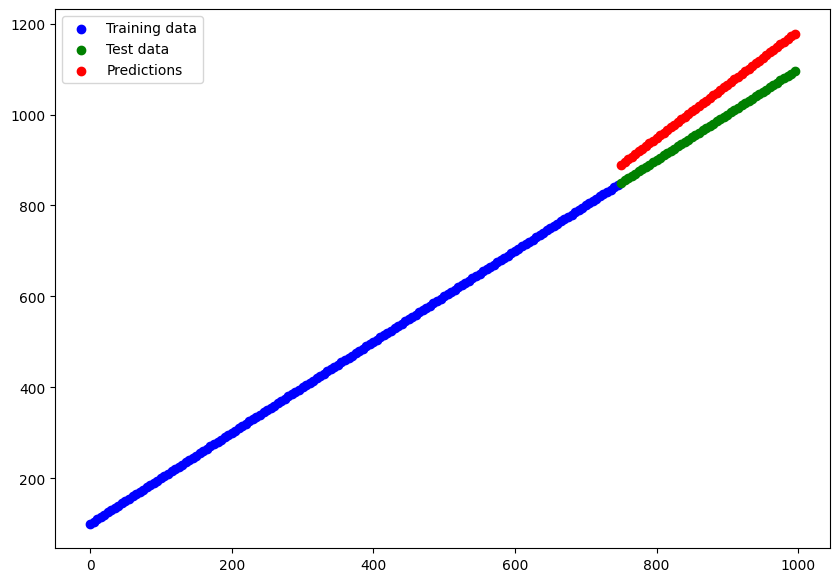

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(x_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(x_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(x_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity  

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(tf.expand_dims(x, axis=1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3951 - accuracy: 0.4964
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3558 - accuracy: 0.4972
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3375 - accuracy: 0.4989
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3163 - accuracy: 0.4999
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3017 - accuracy: 0.5024
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2933 - accuracy: 0.4973
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2154 - accuracy: 0.4995
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2391 - accuracy: 0.4966
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2087 - accuracy: 0.5003
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1759 - accuracy: 0.5010
Epoch 11/

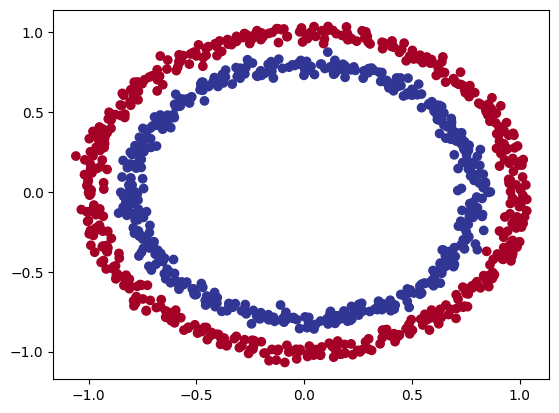

In [ ]:
# Check out our data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classfication


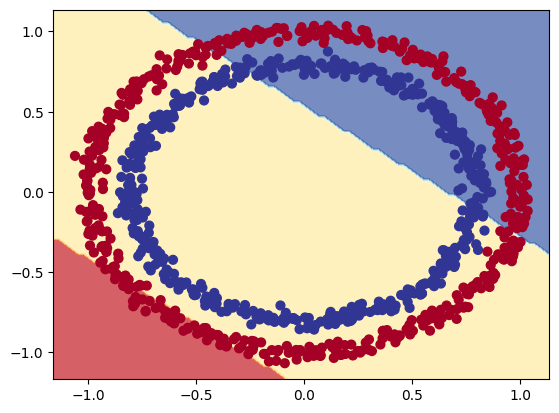

In [ ]:
# Check the predictions for our latest model
plot_dicision_boundary(model_4, x, y)

In [ ]:
tf.random.set_seed(42)

model_5 =tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_5.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3036 - accuracy: 0.4250
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1734 - accuracy: 0.4480
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0986 - accuracy: 0.4580
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0385 - accuracy: 0.4610
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9593 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8617 - accuracy: 0.4650
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7366 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5897 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4583 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2894 - accuracy: 0.4700
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TesorFlow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])


history = model_6.fit(x, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.2441 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0078 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8932 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.4760
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7899 - accuracy: 0.4330
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7702 - accuracy: 0.4280
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.3930
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7556 - accuracy: 0.3700
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7514 - accuracy: 0.3880
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.3900
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9280


[0.17114800214767456, 0.9279999732971191]

313/313 [==============================] - 0s 1ms/step
doing binary classfication


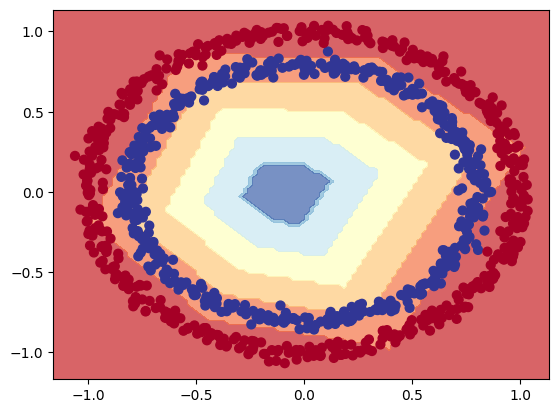

In [ ]:
# Let's look at how our model did
plot_dicision_boundary(model_6, x, y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_7.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6922 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5120
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5110
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5110
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5190
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5230
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5220
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5210
Epoch 11/

In [ ]:
# Evaluate the model
model_7.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.9600


[0.3370882570743561, 0.9599999785423279]

313/313 [==============================] - 0s 1ms/step
doing binary classfication


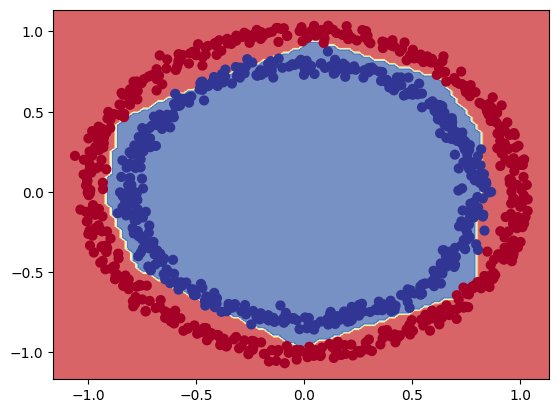

In [ ]:
plot_dicision_boundary(model_7, x, y)

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Let's plot it

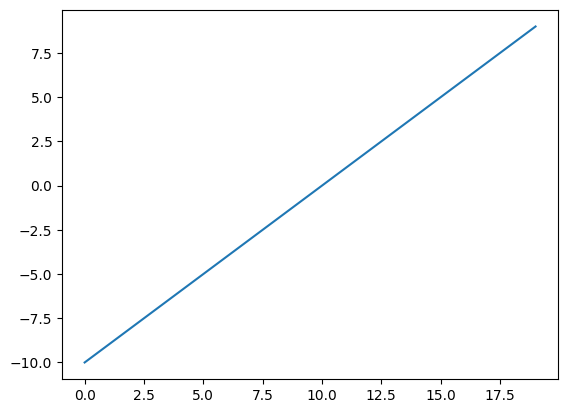

In [ ]:
plt.plot(A);

 now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [ ]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tesor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

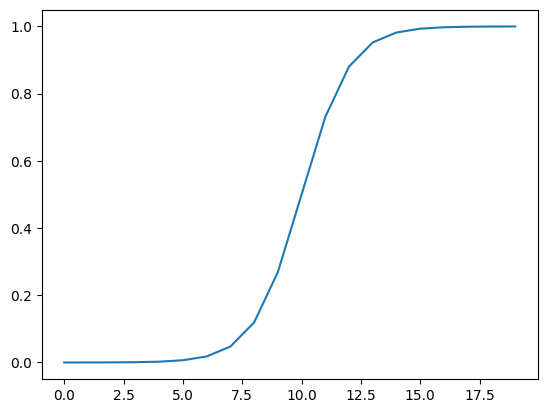

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

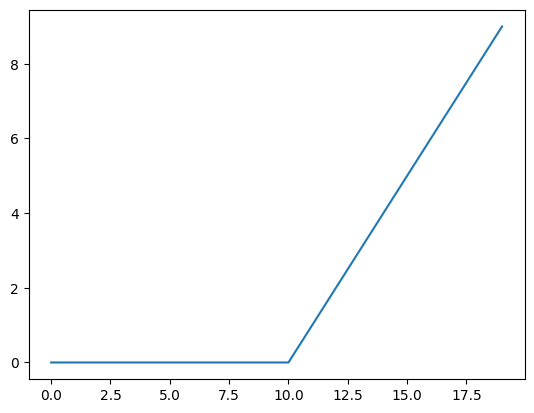

In [ ]:
plt.plot(relu(A));

In [ ]:
# Let's try the linera activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

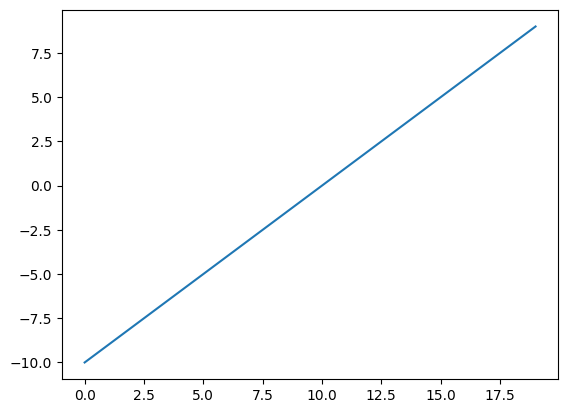

In [ ]:
plt.plot(tf.keras.activations.linear(A));

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classfication model

So far we have been training and testing on the same dataset
in machine learning this basically a sin
So let's create a training and test set

In [ ]:
# Check how many examples we have

len(x)

1000

In [ ]:
x_train , y_train = x[:800], y[:800]
x_test , y_test = x[800:], y[800:]

# Check the shape of the data
x_train.shape, x_test.shape

((800, 2), (200, 2))

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(x_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6903 - accuracy: 0.4950
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5612
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6806 - accuracy: 0.5200
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5813
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6075
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.6162
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6850
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.7200
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7525
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7850
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0817 - accuracy: 0.9850


[0.08165386319160461, 0.9850000143051147]

313/313 [==============================] - 1s 1ms/step
doing binary classfication
313/313 [==============================] - 0s 1ms/step
doing binary classfication


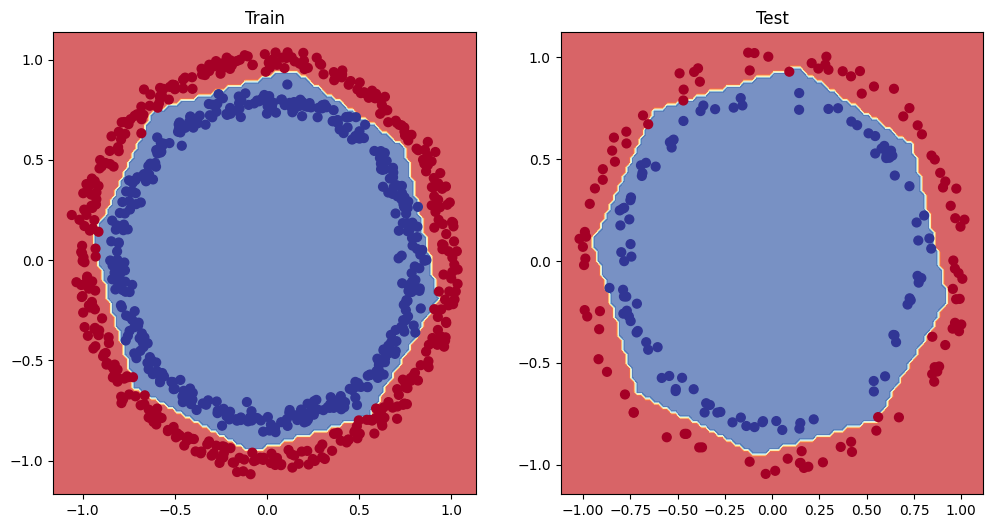

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_dicision_boundary(model_8, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_dicision_boundary(model_8, x=x_test, y=y_test)
plt.show()

## Plot the loss curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.691678,0.50000
1,0.686291,0.52750
2,0.679392,0.54625
3,0.667140,0.61500
4,0.655725,0.62250
5,0.639552,0.61375
6,0.617850,0.67375
7,0.588074,0.70250
8,0.528839,0.81125
9,0.464743,0.84250


Text(0.5, 1.0, 'Model_8 loss curves')

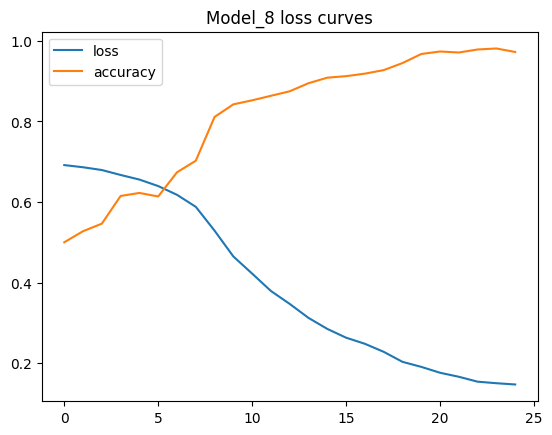

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

## Finding the best learning rate

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

In [ ]:
from keras.src.optimizers.schedules import learning_rate_schedule
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[learning_rate_schedule])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4850 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4850 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4863 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4863 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4875 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

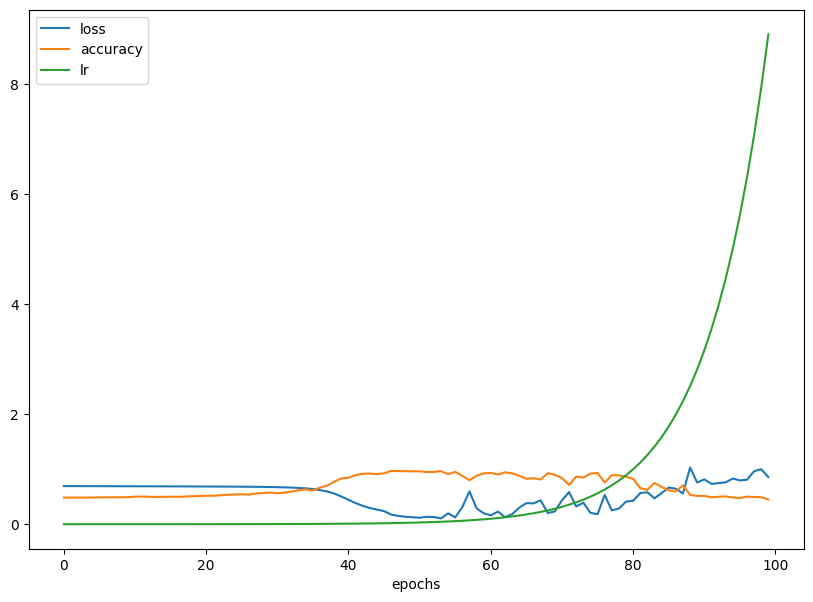

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs loss')

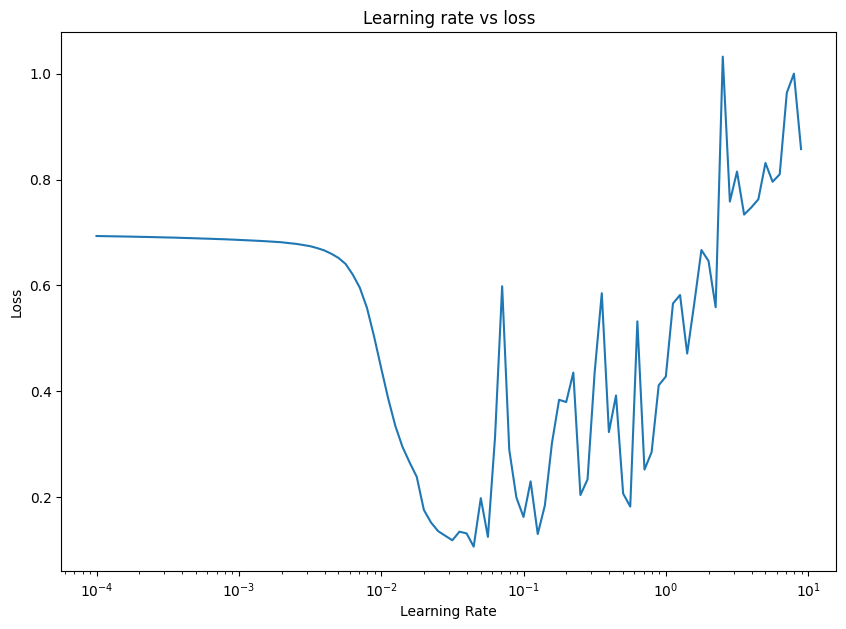

In [ ]:
# Plot the learning rate versus the loss

learning_rate_schedule = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(learning_rate_schedule, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5113
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5225
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5650
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6413
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.7100
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7675
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7962
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8200
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8487
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8537
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9750


[0.0942659080028534, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classfication
313/313 [==============================] - 0s 1ms/step
doing binary classfication


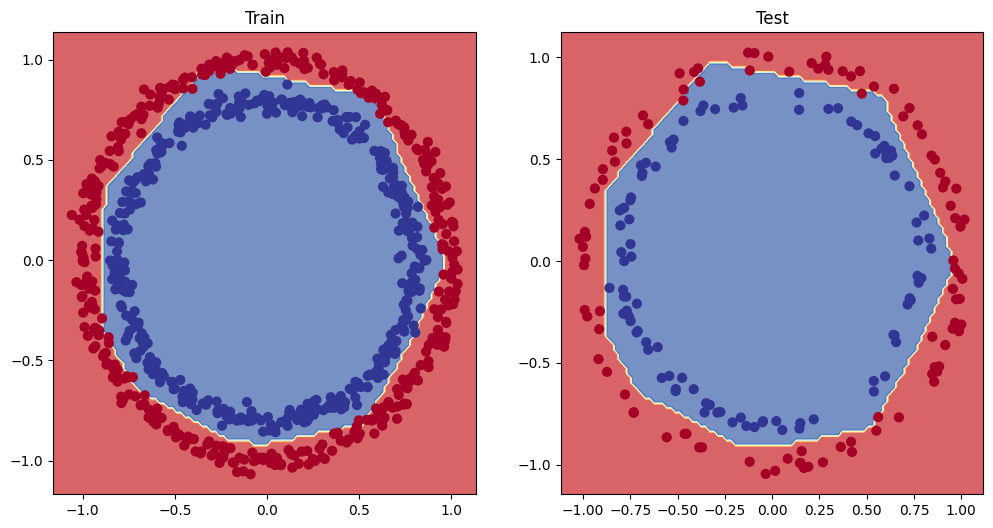

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_dicision_boundary(model_10, x=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_dicision_boundary(model_10, x=x_test, y=y_test)
plt.show()

## More classfication evaluation methods
Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy: 0.9750
Model loss on the test set: 0.0942659080028534
Model accuracy on the test set: 97.50%


How about a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(x_test)

confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.9453075 ],
       [0.9453075 ],
       [0.9453075 ],
       [0.9453075 ],
       [0.64995784],
       [0.00848778],
       [0.9266336 ],
       [0.24972108],
       [0.9453075 ],
       [0.01354187]], dtype=float32)

In [ ]:
# Converting y_preds into 0's and 1's
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[96,  5],
       [ 0, 99]])

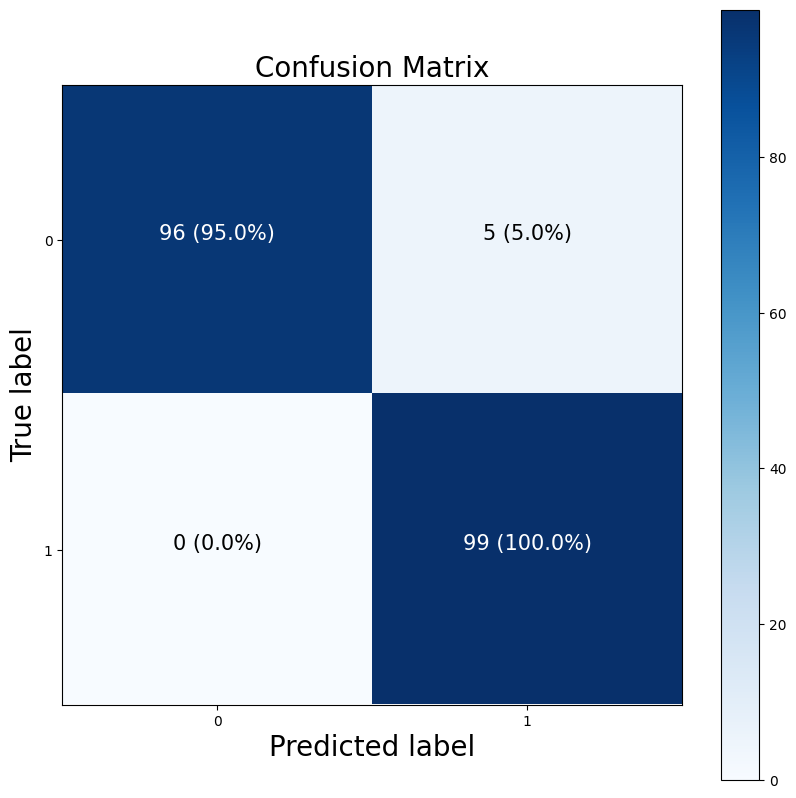

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes =cm.shape[0]

# Prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  label = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to buttom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (Multiclass classfication)

When you have more than two classes as an option, this is known as **multiclass classification**.



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already sorted into training and testing sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

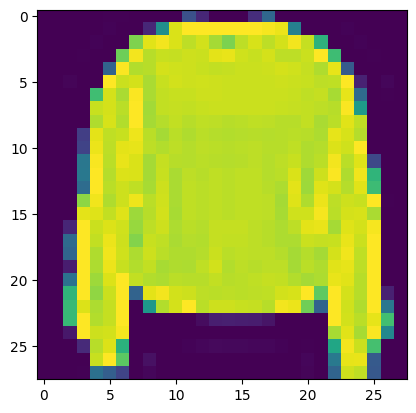

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

2

In [ ]:
# Create a small-index
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

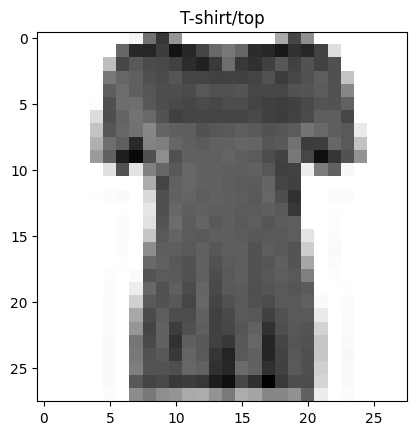

In [ ]:
# Plot an example image and its label
index_of_choice = 10
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

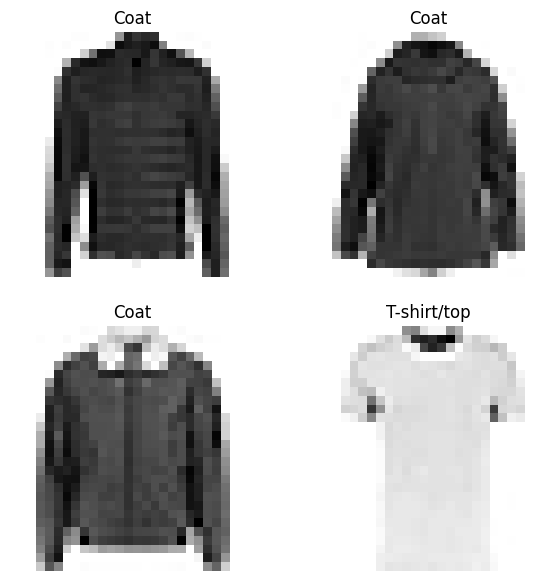

In [ ]:
# Plot multiple random images of fashion MINST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classfication model



In [ ]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_model_11 = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3912 - accuracy: 0.0989 - val_loss: 2.3022 - val_accuracy: 0.1003
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1358 - accuracy: 0.1566 - val_loss: 1.8665 - val_accuracy: 0.2459
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7280 - accuracy: 0.2795 - val_loss: 1.5917 - val_accuracy: 0.3122
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5393 - accuracy: 0.3246 - val_loss: 1.5266 - val_accuracy: 0.3051
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4809 - accuracy: 0.3452 - val_loss: 1.4675 - val_accuracy: 0.3461
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4375 - accuracy: 0.3745 - val_loss: 1.4268 - val_accuracy: 0.3767
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3891 - accuracy: 0.3973 - val_loss: 1.3924 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 4)                 3140      
                                                                 
 dense_39 (Dense)            (None, 4)                 20        
                                                                 
 dense_40 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and the max of the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# We can get our training and test data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is nowmalized , let's build a model to find patterns in it

tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_model_12 = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.1116 - accuracy: 0.5951 - val_loss: 0.7861 - val_accuracy: 0.7172
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7385 - accuracy: 0.7286 - val_loss: 0.7503 - val_accuracy: 0.7258
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6936 - accuracy: 0.7432 - val_loss: 0.7085 - val_accuracy: 0.7370
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6669 - accuracy: 0.7555 - val_loss: 0.6899 - val_accuracy: 0.7466
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6465 - accuracy: 0.7659 - val_loss: 0.6690 - val_accuracy: 0.7579
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6288 - accuracy: 0.7731 - val_loss: 0.6579 - val_accuracy: 0.7678
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6183 - accuracy: 0.7793 - val_loss: 0.6500 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

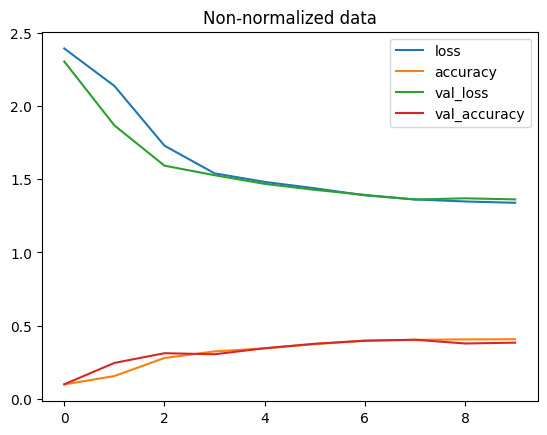

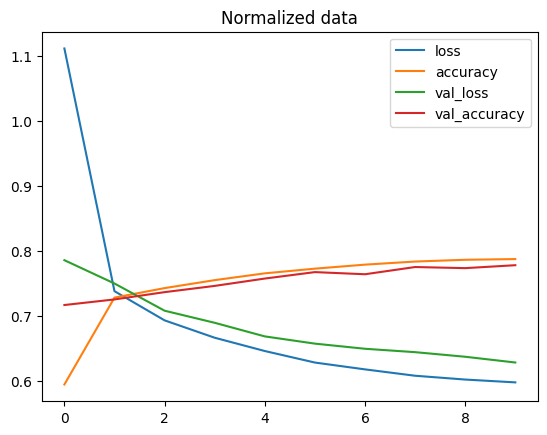

In [ ]:
import pandas as pd
# Plot model_11 and model_12
pd.DataFrame(history_model_11.history).plot(title="Non-normalized data")
# Plot normalized data
pd.DataFrame(history_model_12.history).plot(title="Normalized data")

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_model_13 = model_13.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[learning_rate_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3289 - accuracy: 0.5181 - val_loss: 0.9933 - val_accuracy: 0.6483 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8709 - accuracy: 0.6851 - val_loss: 0.8250 - val_accuracy: 0.7066 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7729 - accuracy: 0.7208 - val_loss: 0.7716 - val_accuracy: 0.7198 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7194 - accuracy: 0.7437 - val_loss: 0.7379 - val_accuracy: 0.7258 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6847 - accuracy: 0.7568 - val_loss: 0.7041 - val_accuracy: 0.7498 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6650 - accuracy: 0.7623 - val_loss: 0.6828 - val_accuracy: 0.7593 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

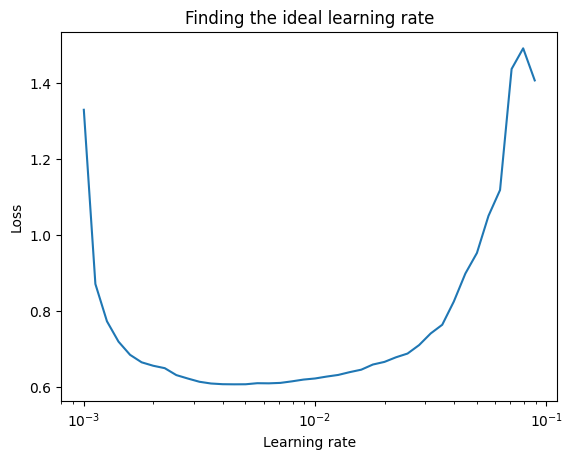

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
learning_rate_scheduler = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(learning_rate_scheduler, history_model_13.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_model_14 = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0487 - accuracy: 0.5792 - val_loss: 0.7516 - val_accuracy: 0.7290
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6725 - accuracy: 0.7641 - val_loss: 0.6625 - val_accuracy: 0.7699
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6087 - accuracy: 0.7902 - val_loss: 0.6221 - val_accuracy: 0.7864
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5807 - accuracy: 0.8013 - val_loss: 0.6006 - val_accuracy: 0.7957
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8063 - val_loss: 0.5877 - val_accuracy: 0.7949
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5508 - accuracy: 0.8096 - val_loss: 0.5803 - val_accuracy: 0.8035
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5418 - accuracy: 0.8127 - val_loss: 0.6090 - val_accuracy:

## Evaluating our multi-class classfication model

In [152]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes =cm.shape[0]

  # Prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to buttom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [153]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [154]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # Probs is short

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.97098498e-08, 8.24741525e-11, 1.08157586e-07, 6.76388663e-05,
        1.39782298e-06, 2.35572502e-01, 4.23058327e-06, 2.17392296e-01,
        3.00256107e-02, 5.16936243e-01],
       [7.30721513e-05, 3.75978866e-11, 9.54742670e-01, 4.37598651e-08,
        2.22858228e-02, 9.38804335e-17, 2.28114873e-02, 1.89462526e-35,
        8.69638825e-05, 2.27084089e-28],
       [3.54467396e-04, 9.97213066e-01, 1.10128008e-06, 2.33342848e-03,
        7.06652572e-05, 2.10445759e-16, 2.72904581e-05, 2.67944577e-20,
        1.52236057e-09, 3.26184392e-11],
       [1.44209916e-04, 9.97884691e-01, 7.71569546e-07, 1.86926278e-03,
        8.48210329e-05, 7.99681529e-16, 1.61824955e-05, 1.90796281e-18,
        1.82880588e-09, 3.18112370e-10],
       [1.04859322e-01, 1.92001298e-05, 1.55552208e-01, 1.23500088e-02,
        4.25763987e-02, 1.28660008e-11, 6.79207146e-01, 3.99536379e-25,
        5.43579226e-03, 6.40377396e-16]], dtype=float32)

In [155]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [156]:
# Convert all of the prediction probabilities into integer
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[771,  17,  12,  62,   6,   3, 120,   0,   9,   0],
       [  6, 957,   4,  22,   7,   0,   3,   0,   1,   0],
       [ 16,   5, 679,   7, 185,   1, 100,   0,   7,   0],
       [ 39,  26,   5, 770,  61,   2,  88,   1,   5,   3],
       [  1,   2, 122,  16, 795,   0,  60,   0,   4,   0],
       [  0,   0,   0,   1,   0, 910,   0,  58,   6,  25],
       [151,   8, 145,  48, 163,   2, 470,   0,  13,   0],
       [  0,   0,   0,   0,   0,  37,   0, 949,   1,  13],
       [  0,   1,  15,  11,   6,   9,  40,   5, 912,   1],
       [  0,   0,   0,   2,   0,  24,   0,  64,   4, 906]])

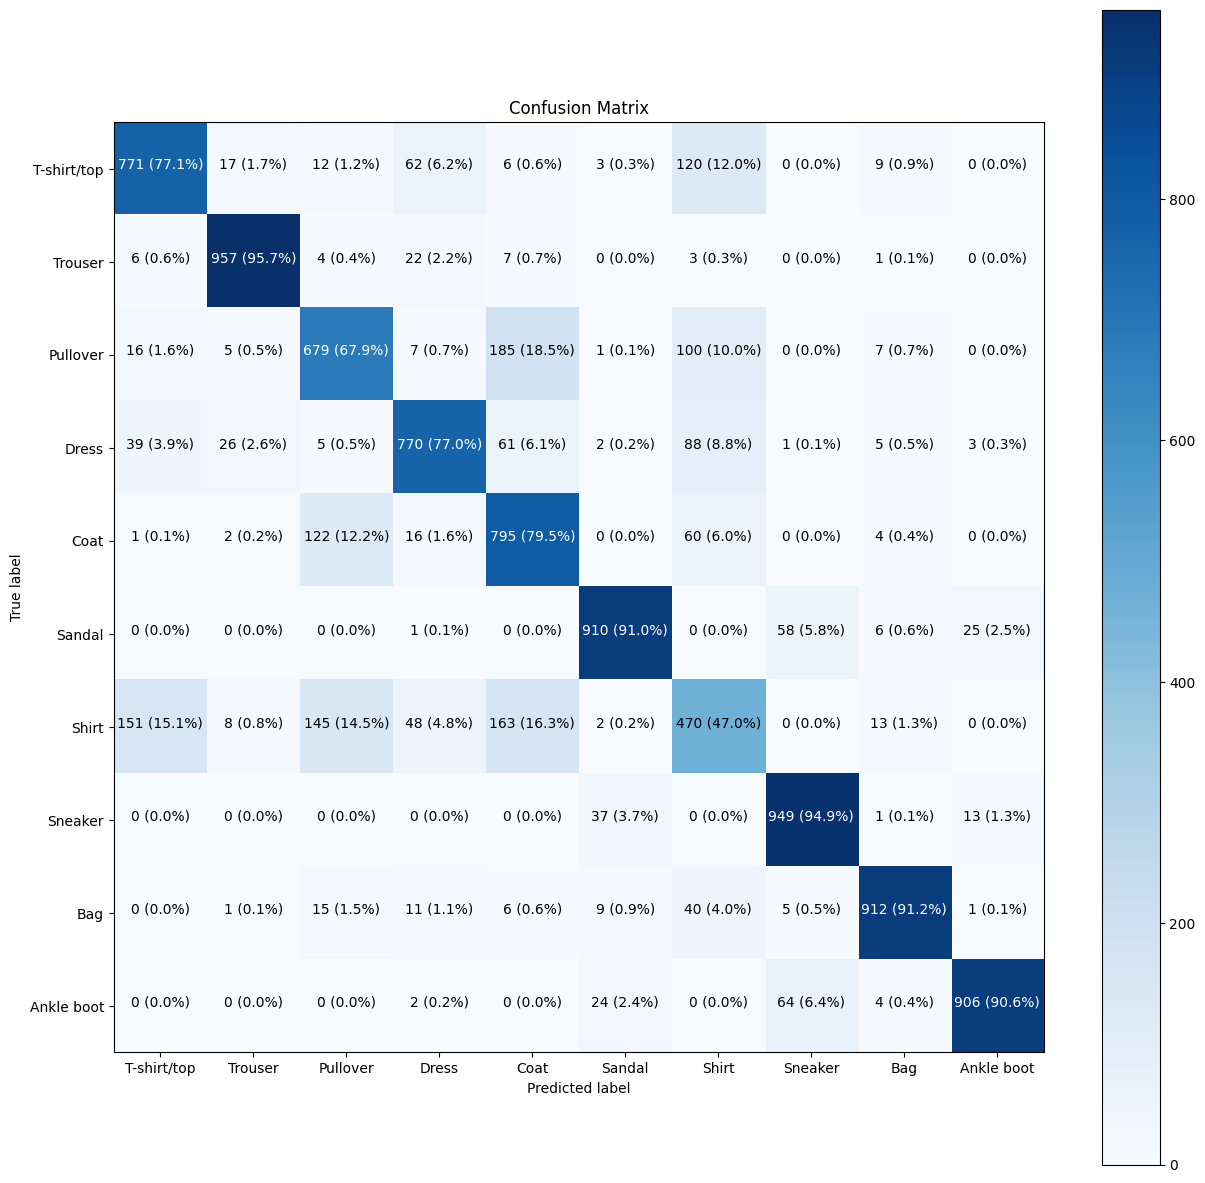

In [158]:
# Make it look pretty
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

How about we create a fun little function for :
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [167]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth labels.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Chage the color of the titles depending on if the predictions is the right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel inforamtion (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 21ms/step


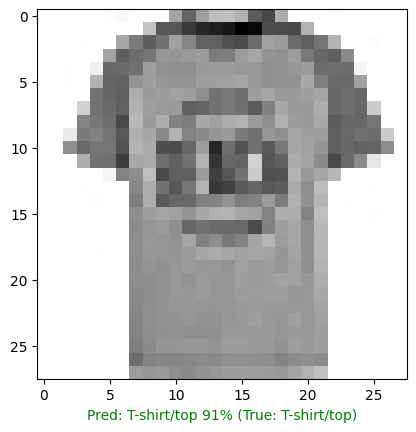

In [177]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning ?

In [178]:
# Find the layers of our most recent model
model_14.layers

In [179]:
# Extract a paticular layer
model_14.layers[1]

In [180]:
# Get the patters of a layer in our network
weights , biases = model_14.layers[1].get_weights()

# Shape
weights, weights.shape

(array([[ 0.03316305,  0.20632175,  0.21618666, -0.5147404 ],
        [-0.3240485 ,  0.4230036 ,  0.15245697, -0.4715447 ],
        [-0.88969475,  1.1253301 ,  0.09109943, -1.0155699 ],
        ...,
        [-0.36153942, -0.03330518, -0.4127437 , -0.12672797],
        [-0.8066757 , -0.01826041,  0.2924758 , -0.10801445],
        [ 0.54423755,  0.29273117,  0.34130675, -0.18879442]],
       dtype=float32),
 (784, 4))

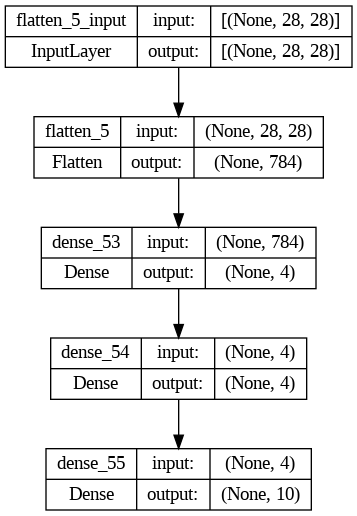

In [181]:
# Lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)